# Modelo de Regresión Logística para Diagnóstico de Diabetes

## Carga y Preprocesamiento de Datos

In [1]:

# Importar bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos
data = pd.read_csv('diabetes_indiana.csv')

# Separar características y variable objetivo
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Diseño del Modelo

In [2]:

from sklearn.linear_model import LogisticRegression

# Entrenar el modelo de Regresión Logística
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = logistic_model.predict(X_test)
y_prob = logistic_model.predict_proba(X_test)[:, 1]


## Evaluación del Modelo

In [3]:

from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print(f"Precisión del modelo: {accuracy:.2f}")
print("Reporte de Clasificación:")
print(classification_rep)
print(f"AUC-ROC: {roc_auc:.2f}")


Precisión del modelo: 0.75
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

AUC-ROC: 0.81


## Gráfica Personalizada e Interpretación de Resultados

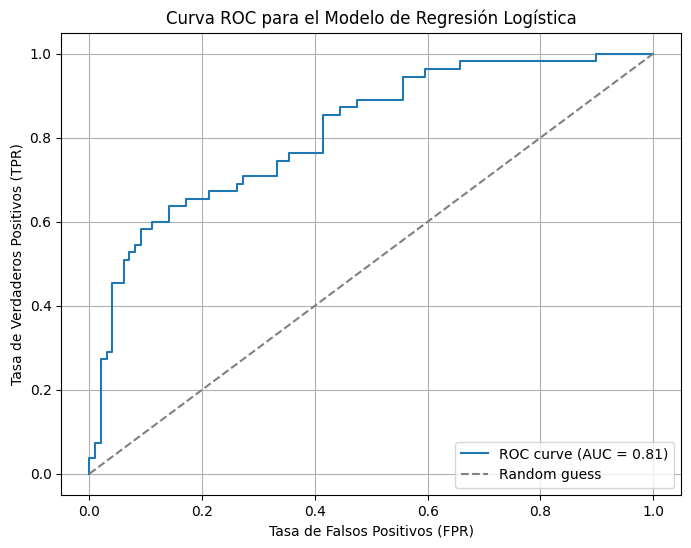

In [4]:

import matplotlib.pyplot as plt

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guess')
plt.title('Curva ROC para el Modelo de Regresión Logística')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
